<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [654]:
import pandas as pd
import psycopg2
import warnings
warnings.filterwarnings('ignore')
import requests
from bs4 import BeautifulSoup
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns

In [655]:
# вставьте сюда параметры подключения из юнита 1. Работа с базой данных из Python
DBNAME = 'project_sql'
USER = 'skillfactory'
PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'
HOST = '84.201.134.129'
PORT = 5432 

In [656]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [657]:
# текст запроса
query_3_1 = f'''select
                    count(*) "Количество вакансий"
                from
                    public.vacancies
'''

In [658]:
# результат запроса
vacan_qty = pd.read_sql_query(query_3_1, connection)
answer = vacan_qty['Количество вакансий'][0]
#display(vacan_qty)
print(f'Количество вакансий составляет: {answer}')

Количество вакансий составляет: 49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [659]:
# текст запроса
query_3_2 = f'''select
                    count(*) "Количество работадателей"
                from
                    public.employers
'''

In [660]:
# результат запроса\
employer_qty = pd.read_sql_query(query_3_2, connection)
answer = employer_qty['Количество работадателей'][0]
#display(employer_qty)
print(f'Количество работадателей составляет: {answer}')

Количество работадателей составляет: 23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [661]:
# текст запроса
query_3_3 = f'''select
                    count(*) "Количество регионов"
                from 
                    public.areas
'''

In [662]:
# результат запроса
area_qty = pd.read_sql_query(query_3_3, connection)
#display(area_qty)
answer = area_qty['Количество регионов'][0]
print(f'Количество регионов составляет: {answer}')

Количество регионов составляет: 1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [663]:
# текст запроса
query_3_4 = '''select
                    count(*) "Количество сфер деятельности"
                from
                    public.industries
'''

In [664]:
# результат запроса
indust_qty = pd.read_sql_query(query_3_4, connection)
#display(indust_qty)
answer = indust_qty['Количество сфер деятельности'][0]
print(f'Количество сфер деятельности составляет: {answer}')

Количество сфер деятельности составляет: 294


***

In [665]:
# выводы по предварительному анализу данных
totals = pd.concat([vacan_qty, employer_qty, area_qty, indust_qty], axis=1)
totals['Вакансии в регионе (среднее)'] = round(totals['Количество вакансий'] / totals['Количество регионов'])
totals['Вакансий на работодателя (среднее)'] = round(totals['Количество вакансий'] / totals['Количество работадателей'])
display(totals)



,Количество вакансий,Количество работадателей,Количество регионов,Количество сфер деятельности,Вакансии в регионе (среднее),Вакансий на работодателя (среднее)
0,49197,23501,1362,294,36.0,2.0


Предварительный анализ показывает, что при относительно большом количестве работодателей и регионов, количество вакансий достаточно скромное (всего две вакансии в среднем на работодателя и 36 вакансий в среднем в каждом регионе). Это может свидетельствовать о том, что далеко не во всех регионах вакансии распределены равномерно: есть регионы с очень большим количеством вакансий (наиболее крупные города), в небольших городах ситуация абсолютно противоположная - такие города зачастую сами являются донорами трудовых ресурсов для крупных городов, исключением могут являться небольшие города, куда в основном приезжают работать вахтовым методом (добыча полезных ископаемых, сезонная работа по добыче биоресурсов (например, путина лосося на Дальнем Востоке), моногорода с крупными промышленными предприятиями). Аналогично вакансии очень неравномерно распределены и среди работодателей - у крупных команий могут быть сотни вакансий, тогда как у небольших предприятий всего одна - две вакансии. Дальнейший анализ покажет, как же происходит распределение вакансий, и какие работодатели преобладают на рынке.

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [666]:
# текст запроса
query_4_1 = '''select
                    a.name "Регион",
                    count(v.id) "Количество вакансий"
                from 
                    public.areas a
                join 
                    public.vacancies v on a.id = v.area_id
                group by 1
                order by 2 desc
'''

In [667]:
# результат запроса
area_vacan = pd.read_sql_query(query_4_1, connection)
print('Регионы-лидеры по количеству вакансий:')
display(area_vacan.head(20))

Регионы-лидеры по количеству вакансий:


,Регион,Количество вакансий
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892
5,Екатеринбург,1698
6,Нижний Новгород,1670
7,Казань,1415
8,Краснодар,1301
9,Самара,1144


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [668]:
# текст запрос
query_4_2 = '''select
                    'ЗП указана' "Указана ли ЗП?",    
                    count(*) "Количество вакансий"
                from
                    public.vacancies
                where 
                    salary_from is not null
                or 
                    salary_to is not null
                    
                union all
                
                select
                    'ЗП не указана',
                    count(*)
                from
                    public.vacancies
                where 
                    salary_from is null and salary_to is null
                order by 2    
                
'''

In [669]:
# результат запроса
vacan_salaries = pd.read_sql_query(query_4_2, connection)
#display(vacan_salaries)
#answer = vacan_salaries['Вакансии с заполненной ЗП'][1]
#print(f'Количество вакансий с заполненными полями ЗП составляет: {answer}')

display(vacan_salaries)

,Указана ли ЗП?,Количество вакансий
0,ЗП указана,24073
1,ЗП не указана,25124


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [670]:
# текст запроса
query_4_3 = '''select
                    round(avg(salary_from)) "Среднее нижней границы ЗП",
                    round(avg(salary_to)) "Среднее верхней границы ЗП"
                from
                    public.vacancies
'''

In [671]:
# результат запроса
avg_salaries = pd.read_sql_query(query_4_3, connection)
#display(avg_salaries)
answer = avg_salaries.loc[0]
print(f'Среднее значение нижней границы зарплатной вилки: {answer[0]} рублей')
print(f'Среднее значение верхней границы зарплатной вилки: {answer[1]} рублей')

Среднее значение нижней границы зарплатной вилки: 71065.0 рублей
Среднее значение верхней границы зарплатной вилки: 110537.0 рублей


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [712]:
# текст запроса
query_4_4 = '''select                    
                    schedule || '/' || employment "График/Трудоустройство",
                    count(*) "Количество вакансий"
                from
                    public.vacancies
                group by schedule, employment
                order by 2 desc 
'''

In [713]:
# результат запроса
schedule_employment = pd.read_sql_query(query_4_4, connection)
display(schedule_employment)
print()
print('Вторая по популярности пара "график работы - тип трудоустройства":')
display(schedule_employment.iloc[[1]])


,График/Трудоустройство,Количество вакансий
0,Полный день/Полная занятость,35367
1,Удаленная работа/Полная занятость,7802
2,Гибкий график/Полная занятость,1593
3,Удаленная работа/Частичная занятость,1312
4,Сменный график/Полная занятость,940
5,Полный день/Стажировка,569
6,Вахтовый метод/Полная занятость,367
7,Полный день/Частичная занятость,347
8,Гибкий график/Частичная занятость,312
9,Полный день/Проектная работа,141



Вторая по популярности пара "график работы - тип трудоустройства":


,График/Трудоустройство,Количество вакансий
1,Удаленная работа/Полная занятость,7802


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [674]:
# текст запроса
query_4_5 = '''select
                    experience "Требуемый опыт работы",
                    count(*) "Количество вакансий"                    
                from
                    public.vacancies
                where experience is not null
                group by 1
                order by count(*) 
'''

In [675]:
# результат запроса
exp_info = pd.read_sql_query(query_4_5, connection)
display(exp_info)

,Требуемый опыт работы,Количество вакансий
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


***

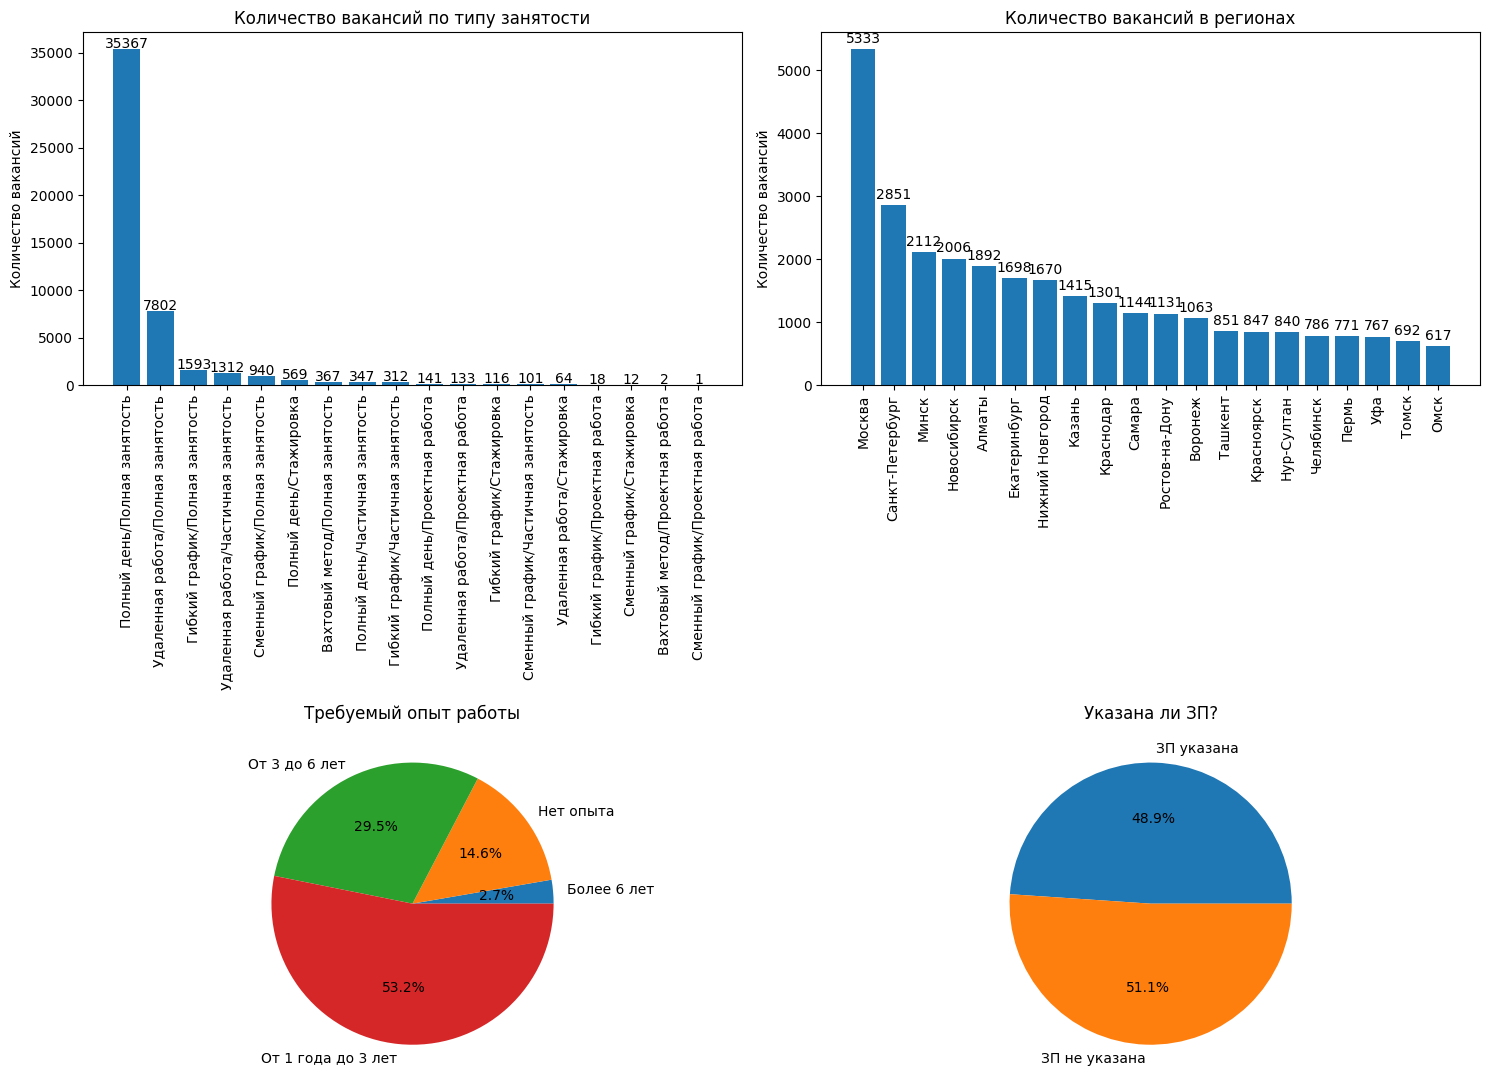

In [727]:
# выводы по детальному анализу вакансий

# Данные для первого bar chart
employment_data_x = schedule_employment['График/Трудоустройство'].to_list()
employment_data_y = schedule_employment['Количество вакансий'].to_list()

# Данные для второго bar chart
region_data = area_vacan['Регион'].to_list()[:20]
vacan_qty = area_vacan['Количество вакансий'].to_list()[:20]

# Данные для первого pie chart
experience_data = exp_info['Количество вакансий'].to_list()
experience_labels = exp_info['Требуемый опыт работы'].to_list()

# Данные для второго pie chart
salary_data = vacan_salaries['Количество вакансий'].to_list()
salary_labels = vacan_salaries['Указана ли ЗП?'].to_list()

# Создание subplot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 11))
plt.subplots_adjust(hspace=0.5)

# Bar chart для Типа занятости
ax1 = axes[0, 0]
ax1.bar(employment_data_x, employment_data_y)
ax1.set_title("Количество вакансий по типу занятости")
ax1.set_ylabel("Количество вакансий")
ax1.tick_params(axis='x', rotation=90)
for i, v in enumerate(employment_data_y):
    ax1.text(i, v + 100, str(v), ha='center')


# Bar chart для Регионов
ax2 = axes[0, 1]
ax2.bar(region_data, vacan_qty)
ax2.set_title("Количество вакансий в регионах")
ax2.set_ylabel("Количество вакансий")
ax2.tick_params(axis='x', rotation=90)
for i, v in enumerate(vacan_qty):
    ax2.text(i, v + 100, str(v), ha='center')

# Pie chart для Требуемого опыта работы
ax3 = axes[1, 0]
ax3.pie(experience_data, labels=experience_labels, autopct='%1.1f%%')
ax3.set_title("Требуемый опыт работы")

# Pie chart для Указания ЗП
ax4 = axes[1, 1]
ax4.pie(salary_data, labels=salary_labels, autopct='%1.1f%%')
ax4.set_title("Указана ли ЗП?")

# Отобразить графики
plt.tight_layout()
plt.show()

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [677]:
# текст запроса
query_5_1 = '''(select
                    e.name "Работодатель"                    
                from
                    public.vacancies v
                join 
                    public.employers e on e.id = v.employer_id
                group by 1
                order by count(v.id) desc
                limit 1)
                
                union all
                
                (select
                    e.name "Работодатель"                    
                from
                    public.vacancies v
                join 
                    public.employers e on e.id = v.employer_id
                group by 1
                order by count(v.id) desc
                offset 4
                limit 1)                
'''

In [678]:
# результат запроса
employer_info = pd.read_sql_query(query_5_1, connection)
answer = employer_info['Работодатель']
print(f'Работодатели, находящиеся на первом и пятом месте по количеству вакансий: {answer[0]} и {answer[1]}')


Работодатели, находящиеся на первом и пятом месте по количеству вакансий: Яндекс и Газпром нефть


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [679]:
# текст запроса
query_5_2 = '''(select
                    a.name "Регион",
                    count(distinct v.employer_id) "Количество работодателей",
                    count(v.id) "Количество вакансий"                                       
                from
                    public.vacancies v
                join 
                    public.areas a on a.id = v.area_id
                group by a.id
                order by 2 desc)
                
                union all
                
                (select
                    a.name "Регион",
                    count(distinct e.id) "Количество работодателей",
                    count(v.id) "Количество вакансий"                                       
                from
                    public.areas a                    
                left join 
                    public.vacancies v on a.id = v.area_id
                join
                    public.employers e on a.id = e.area
                where v.id is null
                group by a.id
                order by 2 desc
                limit 1)             
'''

In [680]:
# результат запроса
employer_qty_area = pd.read_sql_query(query_5_2, connection)
answer = employer_qty_area[employer_qty_area['Количество вакансий'] == 0].iloc[0, 0]
display(employer_qty_area.head())
print(f'Регион с наибольшим количеством работодателей, и в котором нет вакансий: {answer}')
display(employer_qty_area.tail(1))

,Регион,Количество работодателей,Количество вакансий
0,Москва,2320,5333
1,Санкт-Петербург,1451,2851
2,Минск,851,2112
3,Новосибирск,802,2006
4,Алматы,798,1892


Регион с наибольшим количеством работодателей, и в котором нет вакансий: Россия


,Регион,Количество работодателей,Количество вакансий
769,Россия,410,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [681]:
# текст запроса
query_5_3 = ''' select
                    e.name "Работодатель",
                    count(distinct v.area_id) "Количество регионов"                                                          
                from
                    public.employers e                    
                join 
                    public.vacancies v on e.id = v.employer_id                
                group by e.id
                order by 2 desc                            
'''

In [682]:
# результат запроса
employer_area = pd.read_sql_query(query_5_3, connection)
answer = employer_area['Количество регионов'].max()
print(f'Максимальное количество регионов, где один работодатель разместил свои резюме, составляет: {answer}')
display(employer_area.head(10))

Максимальное количество регионов, где один работодатель разместил свои резюме, составляет: 181


,Работодатель,Количество регионов
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
5,Совкомбанк,63
6,МТС,55
7,"ЭФКО, Управляющая компания",49
8,КРОН,48
9,Почта России,48


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [683]:
# текст запроса
query_5_4 = ''' select
                    count(*) "Количество работодателей"                                                          
                from
                    public.employers e                    
                left join 
                    public.employers_industries i on e.id = i.employer_id
                where i.employer_id is null                                          
'''

In [684]:
# результат запроса
employer_without_indust = pd.read_sql_query(query_5_4, connection)
## employer_without_indust
answer = employer_without_indust['Количество работодателей'][0]
print(f'Количество работодателей, у которых не указана сфера деятельности: {answer}')

Количество работодателей, у которых не указана сфера деятельности: 8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [685]:
# текст запроса
query_5_5 = ''' select
                    e.name,
                    count(i.industry_id) "Количество сфер деятельности"                                                          
                from
                    public.employers e                    
                join 
                    public.employers_industries i on e.id = i.employer_id
                group by 1
                having count(i.industry_id) = 4
                order by 1
                offset 2
                limit 1                                         
'''

In [686]:
# результат запроса
employer_indust_qty = pd.read_sql_query(query_5_5, connection)
answer = employer_indust_qty['name'][0]
print(f'Hазвание компании, находящейся на третьем месте в алфавитном списке (по названию) компаний,\nу которых указано четыре сферы деятельности: {answer}')

Hазвание компании, находящейся на третьем месте в алфавитном списке (по названию) компаний,
у которых указано четыре сферы деятельности: 2ГИС


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [687]:
# текст запроса
query_5_6 = ''' select
                    count(e.id) "Количество работодателей"                                                      
                from
                    public.employers e                    
                join 
                    public.employers_industries ei on e.id = ei.employer_id
                join
                    public.industries i on ei.industry_id = i.id
                where i.name like 'Разработка программного обеспечения'                                         
'''

In [688]:
# результат запроса
employer_indust_name = pd.read_sql_query(query_5_6, connection)
answer = employer_indust_name['Количество работодателей'][0]
print(f'Количество работодателей, у которых в качестве сферы \nдеятельности указана "Разработка программного обеспечения: {answer}')

Количество работодателей, у которых в качестве сферы 
деятельности указана "Разработка программного обеспечения: 3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [689]:
# код для получения списка городов-милионников - способ 1
url = 'https://ru.wikipedia.org/wiki/Города-миллионеры_России'
response = requests.get(url)
page = BeautifulSoup(response.text, 'html.parser')
rows = page.find('table', class_='standard sortable').find_all('a')[4:]
million_city_list = [row.text for row in rows]
print('Список городов - миллионников:\n\n', million_city_list)

Список городов - миллионников:

 ['Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Нижний Новгород', 'Красноярск', 'Челябинск', 'Самара', 'Уфа', 'Ростов-на-Дону', 'Краснодар', 'Омск', 'Воронеж', 'Пермь', 'Волгоград']


In [690]:
# код для получения списка городов-милионников - способ 2 (спарсил всю таблицу с википедии)
url = 'https://ru.wikipedia.org/wiki/Города-миллионеры_России'
response = requests.get(url)
page = BeautifulSoup(response.text, 'html.parser')
rows = page.find('table', class_='standard sortable').find_all('tr')[1:]
columns = page.find('table', class_='standard sortable').find_all('tr')[0]

def extract_column_values(columns):
    data = [value for value in columns.find_all('th')]
    extacted_data = [i.text for i in data]
    return extacted_data

def extract_row_values(rows):
    table_rows = []
    for row in rows:
        table_data = row.find_all('td')
        data = [value.text for value in table_data]
        table_rows.append(data)
    return table_rows

df_col_names = extract_column_values(columns)
df_rows = extract_row_values(rows)        
df_million_cities = pd.DataFrame(data = df_rows, columns = df_col_names)
df_million_cities = df_million_cities.drop('№', axis = 1)
display(df_million_cities.head(2))
print('Список городов - миллионников:\n\n', df_million_cities['Город'].to_list())

,Город,"Население, тыс. чел. (на 1 января 2023 года)","Население, тыс. чел. (итоги переписи 2021 года)[5]",Прирост относительно переписи-2010,"Население, тыс. чел.(итоги переписи 2010 года)[6]"
0,Москва,13 098,13 010,"13,1 %",11 504
1,Санкт-Петербург,5 598,5 602,"14,8 %",4 880


Список городов - миллионников:

 ['Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Нижний Новгород', 'Красноярск', 'Челябинск', 'Самара', 'Уфа', 'Ростов-на-Дону', 'Краснодар', 'Омск', 'Воронеж', 'Пермь', 'Волгоград']


In [691]:
# текст запроса
million_city_list = df_million_cities['Город'].to_list()

query_5_7 = f'''(select
                    a.name "Город",
                    count(v.id)  "Количество вакансий"                                                        
                from
                    public.areas a                    
                join 
                    public.vacancies v on a.id = v.area_id
                join
                    public.employers e on e.id = v.employer_id
                where
                    a.name in {(*million_city_list, )} 
                and
                    e.name = 'Яндекс'
                group by 1
                )
                    
                union all
                
                (select
                    'total',
                    count(v.id)                                                          
                from
                    public.areas a                    
                join 
                    public.vacancies v on a.id = v.area_id
                join
                    public.employers e on e.id = v.employer_id
                where
                    a.name in {(*million_city_list, )} 
                and
                    e.name = 'Яндекс'
                )
                order by 2
'''

In [692]:
# результат запроса
cities_yandex = pd.read_sql_query(query_5_7, connection)
print('Города, в которых размещены вакансии компании "Яндекс": \n')
display(cities_yandex)




Города, в которых размещены вакансии компании "Яндекс": 



,Город,Количество вакансий
0,Омск,21
1,Челябинск,22
2,Красноярск,23
3,Волгоград,24
4,Пермь,25
5,Казань,25
6,Ростов-на-Дону,25
7,Уфа,26
8,Самара,26
9,Краснодар,30


***

In [693]:
# выводы по анализу работодателей

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [694]:
# текст запроса
vac_to_search = ['%data%', '%данн%']
query_6_1 = f'''select
                    count(v.id) "Количество вакансий"                                                      
                from
                    public.vacancies v                       
                where 
                    v.name ilike any (array{vac_to_search})                                         
'''

In [695]:
# результат запроса
data_vacancies = pd.read_sql_query(query_6_1, connection)
data_vacancies

,Количество вакансий
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [696]:
# текст запроса
ds_vacan_list = ['%data scientist%', '%data science%', '%исследователь данных%', '%machine learning%', '%машинн%обучен%']

query_6_2 = f'''select
                    count(*) "Количество вакансий"                                                    
                from
                    public.vacancies v                       
                where 
                    ((v.name ilike any (array{ds_vacan_list}) or v.name like '%ML%') and v.name not ilike '%HTML%')
                and    
                    (v.name ilike '%junior%' or v.experience = 'Нет опыта' or v.employment = 'Стажировка')                                   
'''

In [697]:
# результат запроса
ds_vacancies_count = pd.read_sql_query(query_6_2, connection)
ds_vacancies_count

,Количество вакансий
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [698]:
# текст запроса
ds_vacan_list = ['%data scientist%', '%data science%', '%исследователь данных%', '%machine learning%', '%машинн%обучен%']

query_6_3 = f'''select
                    count(*) "Количество вакансий"                                                    
                from
                    public.vacancies v                       
                where 
                    ((v.name ilike any (array{ds_vacan_list}) or v.name like '%ML%') and v.name not ilike '%HTML%')
                and    
                    v.key_skills ilike any (array['%SQL%', '%postgres%'])                                     
'''

In [699]:
# результат запроса
ds_vacancies_count_sql = pd.read_sql_query(query_6_3, connection)
ds_vacancies_count_sql

,Количество вакансий
0,201


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [700]:
# текст запроса
ds_vacan_list = ['%data scientist%', '%data science%', '%исследователь данных%', '%machine learning%', '%машинн%обучен%']

query_6_4 = f'''select
                    count(*) "Количество вакансий"                                                    
                from
                    public.vacancies v                       
                where 
                    ((v.name ilike any (array{ds_vacan_list}) or v.name like '%ML%') and v.name not ilike '%HTML%')
                and    
                    v.key_skills ilike '%python%'
'''

In [701]:
# результат запроса
ds_vacancies_count_python = pd.read_sql_query(query_6_4, connection)
ds_vacancies_count_python

,Количество вакансий
0,351


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [702]:
# текст запроса
ds_vacan_list = ['%data scientist%', '%data science%', '%исследователь данных%', '%machine learning%', '%машинн%обучен%']

query_6_5 = f'''select
                    *                                                  
                from
                    public.vacancies v                       
                where 
                    ((v.name ilike any (array{ds_vacan_list}) or v.name like '%ML%') and v.name not ilike '%HTML%')
                and
                    v.key_skills is not null
'''

In [703]:
# результат запроса
ds_vacancies = pd.read_sql_query(query_6_5, connection)
ds_vacancies['key_skills'] = ds_vacancies['key_skills'].astype('str')
ds_vacancies['key_skills_count'] = ds_vacancies['key_skills'].apply(lambda x: len(x.replace(' ', '').split()))
ds_vacancies[['key_skills', 'key_skills_count']]
ds_vacancies['key_skills_count'].mean().round(2)

6.41

In [704]:
# текст запроса
ds_vacan_list = ['%data scientist%', '%data science%', '%исследователь данных%', '%machine learning%', '%машинн%обучен%']

query_6_5 = f'''select
                    avg(length(v.key_skills) - length(replace(v.key_skills, chr(9), '')) + 1)::numeric(3, 2) "Навыки"                                   
                from
                    public.vacancies v                       
                where 
                    ((v.name ilike any (array{ds_vacan_list}) or v.name like '%ML%') and v.name not ilike '%HTML%')
                and
                    v.key_skills is not null
'''

In [705]:
ds_avg_skills = pd.read_sql_query(query_6_5, connection)
ds_avg_skills

,Навыки
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [706]:
# текст запроса
ds_vacan_list = ['%data scientist%', '%data science%', '%исследователь данных%', '%machine learning%', '%машинн%обучен%']

query_6_6 = f'''select
                    v.experience,                                        
                    round(avg((coalesce(salary_from, 0, null) + coalesce(salary_to, 0, null)) / (coalesce(salary_from, 0, null) / coalesce(salary_from, 1, null) + coalesce(salary_to, 0, null)/ coalesce(salary_to, 1, null))))
                from
                    public.vacancies v                       
                where 
                    ((v.name ilike any (array{ds_vacan_list}) or v.name like '%ML%') and v.name not ilike '%HTML%')
                and
                    (salary_from is not null or salary_to is not null)
                group by v.experience
'''

In [707]:
# результат запроса
ds_avg_salary = pd.read_sql_query(query_6_6, connection) 
ds_avg_salary

,experience,round
0,Нет опыта,74643.0
1,От 1 года до 3 лет,139675.0
2,От 3 до 6 лет,243115.0


***

In [708]:
# выводы по предметному анализу

# Общий вывод по проекту

In [709]:
# подведем итог исследования, обобщите выводы
# здесь можно (это будет плюсом) провести дополнительные исследования данных, сделать прогнозы, продумать варианты продолжения исследования